<a href="https://colab.research.google.com/github/ryanmansoor/Binary-Tree-Assignment/blob/master/Cost_of_Interconnection_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialisation


In [ ]:
!pip install overpy
!pip install mpu
!pip install geotiler

     |████████████████████████████████| 51kB 3.6MB/s 
  Created wheel for overpy: filename=overpy-0.4-cp36-none-any.whl size=45772 sha256=b2b5a24390db28f6ba1415bbd517b59a72ea3468d5ffd06f9baf217ade8fc9a1
  Stored in directory: /root/.cache/pip/wheels/10/53/c2/e6b6f97e7bb419193bd3aafbe38628666f0f93a1cec9dc521d
Successfully built overpy
     |████████████████████████████████| 71kB 3.3MB/s 
     |████████████████████████████████| 378kB 4.8MB/s 
     |████████████████████████████████| 481kB 10.9MB/s 
     |████████████████████████████████| 1.2MB 18.1MB/s 
     |████████████████████████████████| 256kB 44.6MB/s 
     |████████████████████████████████| 153kB 38.8MB/s 
  Created wheel for geotiler: filename=geotiler-0.14.4-cp36-none-any.whl size=53637 sha256=b68addd8b3d637c52afd8da287feee4b002a8623a2b3f727f4210fb33ca2b340
  Stored in directory: /root/.cache/pip/wheels/78/0d/ed/77213e2c6f74d27b49ca99c0e1a93188a9421198d4069f43d1
  Created wheel for cytoolz: filename=cytoolz-0.10.1-cp36-cp36m-linu

In [ ]:
import mpu
import sys
import math
import geotiler
import csv
import os
import time
from matplotlib import pyplot as plt
import overpy
from geopy import Nominatim
api = overpy.Overpass()


In [ ]:
# OSM Map colors and Legend (Assosciated Costs Based on: https://www.wecc.org/Reliability/2014_TEPPC_Transmission_CapCost_Report_B+V.pdf)
osm_map_color_dict =	{
    
  "#e892a2": ("Motor Way", 1.70),
  "#dc2a67": ("Motor Way", 1.70),
  "#f9b29c": ("Main Road", 1.60),
  "#fcd6a4": ("Main Road", 1.60),
  "#f7fabf": ("Main Road", 1.60),
  "#c84e2f": ("Main Road", 1.60),
  "#a06b00": ("Main Road", 1.60),
  "#707d05": ("Main Road", 1.60),
  "#a97e27": ("Track", 1.2),
  "#57b257": ("Bridleway", 1.2),
  "#7a7cf6": ("Cycleway", 1.2),
  "#fa7671": ("Footway", 1.2),
  "#999999": ("Railway", 1.5),
  "#bcbcbc": ("Railway", 1.5),
  "#777777": ("Railway", 1.5),
  "#333333": ("Light Rail and Tram", 1.7),
  "#b7b7b7": ("Cable Car and Chairlift", 1.75),
  "#bdbdcd": ("Airport Runway and Taxiway", 5),
  "#cc99ff": ("Airport Apron and Terminal", 5),
  "#e3aeec": ("Administrative Boundary", 1.0),
  "#8dc56c": ("Forest", 2.25),
  "#aed1a0": ("Wood", 2.25),
  "#b5e3b5": ("Golf Course", 5),
  "#b6fdb6": ("Park", 3),
  "#aedfa3": ("Park", 3),
  "#cccccc": ("Residential Area", 1.49),
  "#cfeca8": ("Common and Meadow", 1.0),
  "#f1dada": ("Retail Area", 1.69),
  "#ffaeb9": ("Industrial Area", 1.49),
  "#efc8c8": ("Commercial Area", 1.59),
  "#ffffc0": ("Heathland", 1),
  "#b5d0d0": ("Lake and Reservoir", 5),
  "#ead8bd": ("Farm", 1),
  "#9d9d6c": ("Brownfield Site", 1.59),
  "#aacbaf": ("Cemetery", 1.8),
  "#c8b084": ("Allotments", 1),
  "#8ad3af": ("Sports Pitch", 3),
  "#33cc99": ("Sports Centre", 5),
  "#abdf96": ("Nature Reserve", 5),
  "#cee3c5": ("Nature Reserve", 5),
  "#e18f8f": ("Military Area", 5),
  "#f0f0d8": ("School and University", 5),
  "#eef0d5": ("Wetland", 1.2),
  "#cc9999": ("Significant Building", 5),
  "#d08f55": ("Summit and Peak", 2.25),
  "#bdbece": ("Motorway", 1.70),
  "#9a9ab1": ("Motorway", 1.70),
  "#c8d8c8": ("Trunk Road", 1.5),
  "#abb5a4": ("Trunk Road", 1.5),
  "#d8c8c8": ("Primary Road", 1.5),
  "#f0e3e3": ("Primary Road", 1.5),
  "#d4b6b7": ("Primary Road", 1.5),
  "#dadacc": ("Secondary Road", 1.5),
  "#ededc8": ("Secondary Road", 1.5),
  "#c8b48a": ("Secondary Road", 1.5),
  "#9f6f0f": ("Track", 1.2),
  "#0100fe": ("Cycleway", 1.2),
  "#fe0000": ("National Cycleway", 1.2),
  "#28c8fe": ("Regional Cycleway", 1.2),
  "#b2b2ff": ("Local Cycleway", 1.2),
  "#bd6d6e": ("Footway", 1.2),
  "#cde1c4": ("Forest", 2.25),
  "#bcdd92": ("Common and Meadow", 1),
  "#f2efe8": ("Urban Area", 1.59),
  "#f4e1ec": ("Urban Area", 1.59),
  "#e0dfdf": ("Urban Area", 1.59),
  "#f2efe9": ("Urban Area", 1.59),
  "#f4f2ed": ("Urban Area", 1.59),
  "#f7f5f1": ("Urban Area", 1.59),
  "#add19e": ("Nature Reserve", 5),
  "#aad3df": ("Water", 5),
  "#d1d1d0": ("Common and Meadow", 1),
  "#ffffff": ("Road", 1.2),
  "#d9d0c9": ("Building", 1.59),
  "#bfb0a4": ("Building", 1.59),
}

In [ ]:
# ISO3 alpha 2 Country Codes to Minimum Wage in USD 
min_wage_dict={'AF': 1.57 ,
'AL': 2.51 ,
'DZ': 2.7 ,
'AS': None ,
'AD': 5.3 ,
'AO': 0.92 ,
'AI': None ,
'AQ': None ,
'AG': 3.74 ,
'AR': 8.73 ,
'AM': 1.99 ,
'AW': None ,
'AU': 11.83 ,
'AT': None ,
'AZ': 4.12 ,
'BS': None ,
'BH': None ,
'BD': 0.23 ,
'BB': 2.54 ,
'BY': 3.89 ,
'BE': 11 ,
'BZ': 2.89 ,
'BJ': 1.03 ,
'BM': None ,
'BT': 0.97 ,
'BO': None ,
'BQ': None ,
'BA': 2.89 ,
'BW': 0.56 ,
'BV': None ,
'BR': 2.7 ,
'IO': None ,
'BN': None ,
'BG': 4.91 ,
'BF': 0.92 ,
'BI': None ,
'KH': None ,
'CM': 0.87 ,
'CA': 8.32 ,
'CV': 1.49 ,
'KY': None ,
'CF': 0.67 ,
'TD': 1.72 ,
'CL': 3.39 ,
'CN': 1.68 ,
'CX': None ,
'CC': None ,
'CO': 3.72 ,
'KM': 1.46 ,
'CG': None ,
'CD': None ,
'CK': None ,
'CR': 4.08 ,
'Code': None ,
'HR': 5.41 ,
'CU': 0.08 ,
'CW': None ,
'CY': None ,
'CZ': 5.59 ,
'CI': 0.9 ,
'DK': None ,
'DJ': None ,
'DM': 2.03 ,
'DO': 0.82 ,
'EC': 4.1 ,
'EG': None ,
'SV': 3.07 ,
'GQ': 1.79 ,
'ER': None ,
'EE': 5.26 ,
'ET': None ,
'FK': None ,
'FO': None ,
'FJ': 2.09 ,
'FI': None ,
'FR': 11.53 ,
'GF': None ,
'PF': None ,
'TF': None ,
'GA': 2.34 ,
'GM': None ,
'GE': 0.17 ,
'DE': 11.27 ,
'GH': 0.85 ,
'GI': None ,
'GR': 6.43 ,
'GL': None ,
'GD': None ,
'GP': None ,
'GU': None ,
'GT': 2.79 ,
'GG': None ,
'GN': None ,
'GW': 0.4 ,
'GY': 1.54 ,
'HT': 1.28 ,
'HM': None ,
'VA': None ,
'HN': 2.16 ,
'HK': 5.81 ,
'HU': 6.22 ,
'(.uk)': None ,
'IS': None ,
'IN': 1 ,
'ID': 1.68 ,
'IR': None ,
'IQ': 2.51 ,
'IE': 9.8 ,
'IM': None ,
'IL': 6.59 ,
'IT': None ,
'JM': 1.94 ,
'JP': 7.37 ,
'JE': None ,
'JO': 4.66 ,
'KZ': 1.44 ,
'KE': 0.61 ,
'KI': 1.15 ,
'KP': None ,
'KR': 9.98 ,
'KW': 1.44 ,
'KG': 0.32 ,
'LA': None ,
'LV': 4.35 ,
'LB': 3.58 ,
'LS': 1.29 ,
'LR': 0.19 ,
'LY': 3.74 ,
'LI': None ,
'LT': 6.65 ,
'LU': 11.85 ,
'MO': None ,
'MK': None ,
'MG': 0.75 ,
'MW': 0.41 ,
'MY': 2.66 ,
'MV': 1.875 ,
'ML': 0.62 ,
'MT': 6.8 ,
'MH': 1.88 ,
'MQ': None ,
'MR': 0.14 ,
'MU': 2.32 ,
'YT': None ,
'MX': 1.78 ,
'FM': None ,
'MD': None ,
'MC': None ,
'MN': 1.67 ,
'ME': 2.59 ,
'MS': None ,
'MA': 3.74 ,
'MZ': 0.87 ,
'MM': 1.32 ,
'NA': None ,
'NR': None ,
'NP': 1.76 ,
'NL': 10.47 ,
'NC': None ,
'NZ': 10.79 ,
'NI': 1.36 ,
'NE': 0.78 ,
'NG': 1.4 ,
'NU': None ,
'NF': None ,
'MP': None ,
'NO': None ,
'OM': 8.33 ,
'PK': 2.25 ,
'PW': 3.19 ,
'PS': None ,
'PA': 2.59 ,
'PG': 1.22 ,
'PY': 3.91 ,
'PE': 2.57 ,
'PH': 3.32 ,
'PN': None ,
'PL': 7.98 ,
'PT': 5.94 ,
'PR': None ,
'QA': None ,
'RO': 6.35 ,
'RU': None ,
'RW': None ,
'RE': None ,
'BL': None ,
'SH': None ,
'KN': 4.37 ,
'LC': None ,
'MF': None ,
'PM': None ,
'VC': 1.61 ,
'WS': 1.08 ,
'SM': 12 ,
'ST': None ,
'SA': 7.43 ,
'SN': 0.78 ,
'RS': 4.24 ,
'SC': 3.09 ,
'SL': 1.25 ,
'SG': None ,
'SX': None ,
'SK': 5.36 ,
'SI': 7.63 ,
'SB': 0.41 ,
'SO': None ,
'ZA': 3.8 ,
'GS': None ,
'SS': None ,
'ES': 8.19 ,
'LK': 1.03 ,
'SD': 0.52 ,
'SR': None ,
'SJ': None ,
'SZ': 0.54 ,
'SE': None ,
'CH': None ,
'SY': None ,
'TW': None ,
'TJ': 0.62 ,
'TZ': None ,
'TH': 3.22 ,
'TL': 0.93 ,
'TG': 0.86 ,
'TK': None ,
'TO': None ,
'TT': 2.65 ,
'TN': 1.2 ,
'TR': 9.43 ,
'TM': 2.33 ,
'TC': None ,
'TV': None ,
'UG': 0.62 ,
'UA': 4.61 ,
'AE': None ,
'GB': 10.26 ,
'US': 7.25 ,
'UM': None ,
'UY': 3.34 ,
'UZ': 0.65 ,
'VU': 1.46 ,
'VE': None ,
'VN': None ,
'VG': None ,
'VI': None ,
'WF': None ,
'EH': None ,
'YE': None ,
'ZM': 1.27 ,
'ZW': None ,
'AX': None ,
}

In [ ]:
# The Following Node Datatype is created to store each segment of the map, to perform graph search
class Node():

    def __init__(self, i=0, j=0, f=0, g=0, h=0, coordinates=[0, 0], cost=1.59):
        self.i = i # each node must know which grid index it is in
        self.j = j # therefore i and j are required
        self.f = f # the cost of the cell, f = g + h
        self.g = g # cost up to current cell
        self.h = h # heuristic 
        self.neighbours = []
        self.parent = None

        self.coordinates = coordinates
        self.cost = cost

    def addNeighbours(self, grid):
      i = self.i
      j = self.j
      rows = len(grid)
      cols = len(grid[0])

      if i != 0:
        if j != (cols - 1):
            self.neighbours.append(grid[i-1][j+1])
        if j != 0:
            self.neighbours.append(grid[i-1][j-1])
        self.neighbours.append(grid[i-1][j])

      if i != (rows - 1): 
        if j != (cols - 1):
            self.neighbours.append(grid[i+1][j+1])
        if j != 0:
            self.neighbours.append(grid[i+1][j-1])
        self.neighbours.append(grid[i+1][j])
      
      if j != (cols - 1):
        self.neighbours.append(grid[i][j+1])

      if j != 0:  
        self.neighbours.append(grid[i][j-1])

In [ ]:
def get_closest_connection_point(start, radius=5000):
    """
    :param start: Lat Lng Coordinates of hypothetical plant
    :return: Coordinates and properties of closest substation using the Overpy API
    """

    locator = Nominatim(user_agent='openstreetmap')
    location = locator.reverse(start)
    country_code = location.raw["address"]["country_code"].upper()
    
   
    
    substations = []  
    while len(substations) == 0:
        print('Searching for substations at radius {}km'.format(radius/1000))
        # Get nodes with tag substation
        response = api.query('node[power=substation](around:{2},{0},{1}); out;'
                         .format(start[0], start[1], radius))
        nodes=response.nodes
        for node in nodes:
          substations.append((float(node.lat), float(node.lon)))
        # Get ways with tag substation
        response = api.query('way[power=substation](around:{2},{0},{1}); out center;'
                         .format(start[0], start[1], radius))
               
        for way in response.ways:
          substations.append((float(way.center_lat), float(way.center_lon)))
          
        radius += 5000

        if radius == 50000:
            print('No results found within radius of 50000')
            n_responses = 1

    if len(substations) > 0:
        min_dist = 100000        
        c = 0
        for substation in substations:
            dist = mpu.haversine_distance(start, substation)
            print(c, "Found substation at:",substation, " Distance (km):", dist)
            c+=1
 
        return substations, country_code, location.address
    else:
        print("No results")


In [ ]:
def padded_bbox(start, end, scale_ratio):
    """
    Takes 2 coordinates and generates a bbox with some added margin.
    :param start: Starting lat lng Coordinate (plant)
    :param end: Ending lat lng Coordinate (Tower or Substation)
    :param scale_ratio: Ratio of (padded bbox height): (unpadded bbox height)
    :return: padded bounding box, margin, center coordinates
    """
    center = [(start[0]+end[0])/2, (start[1]+end[1])/2] # center coordinates
    vertical_dist_lat = abs(start[0]-end[0])
    horizontal_dist_lon = abs(start[1]-end[1])

    # bounding area of image, in lat lng coordinates adding a padding of 0.5/2 at each border 
    bot = center[0]-(scale_ratio/2)*vertical_dist_lat
    L = center[1]-(scale_ratio/2)*horizontal_dist_lon
    top = center[0]+(scale_ratio/2)*vertical_dist_lat
    R = center[1]+(scale_ratio/2)*horizontal_dist_lon
    margin = (scale_ratio - 1)/2
    bbox = L, bot, R, top # Bounding box corners of map image, in coordinates
    return bbox, margin, center

In [ ]:
def gen_grid(start, end, zoom_level=16, scale_ratio=2, node_dist=15):

    """
    Generates a square grid containing coordinates encompassing start and end.
    :param start: Starting Coordinate (plant)
    :param end: Ending Coordinate (Tower or Substation)
    :param scale_ratio: Ratio of (padded bbox height): (unpadded bbox height)
    :return: 2D list containing coordinates
    """

    bbox, margin, center = padded_bbox(start, end, scale_ratio) # retrieve a lat lng bounding box encompassing start and end coordinates within a margin, along with center
    
    # The distance in meters of 1 pixel at a given zoom level (e.g 16) as output by geotiler:
    dist_per_pix = 40075016.686 * math.cos(math.radians(center[0])) / (2**(zoom_level + 8)) # 40075016.686 is the circumference of the earth in meters
    print('Distance per pixel', dist_per_pix)
    


    # The number of pixels along one axis of each square cell:
    pix_vals, width, height = gen_map(bbox, start, end, zoom_level=zoom_level) # generate image of bounding area, labelling start and end coordinates. Retrieves pixel values in a 2D array.
    grid_dist_pix = int(round(node_dist/dist_per_pix)) # node_distm is the width of the overhead line to be constructed, the grid cells are therefore always 38mx38m
    
    
    n_grids_width = int(round(width/grid_dist_pix)) # Width of grid in no. of cells
    n_grids_height = int(round(height/grid_dist_pix)) # Height of grid in no. of cells
    lat_step_size = (bbox[3]-bbox[1]) / n_grids_height # Height of cell in latitude degrees
    lon_step_size = (bbox[2]-bbox[0]) / n_grids_width # Width of cell in longitude degrees
    
    


    # Figuring out which index of the graph contains the start point and the end point:
    if start[0] < end[0]: #if the start coordinate is below the end coordinate
        if start[1] < end[1]: #if the start coordinate is to the left of the end coordinate
            start_idx = [int(round(((scale_ratio-margin)/scale_ratio)*n_grids_height)), int(round((margin/scale_ratio)*n_grids_width))] # the index of the start coordinate is at the bottom left of the 2D list (- padding)
            end_idx = [int(round((margin/scale_ratio)*n_grids_height)), int(round(((scale_ratio-margin)/scale_ratio)*n_grids_width))]
        else:
            start_idx = [int(round(((scale_ratio-margin)/scale_ratio)* n_grids_height)), int(round(((scale_ratio-margin)/scale_ratio)* n_grids_width))]
            end_idx = [int(round((margin/scale_ratio) * n_grids_height)), int(round((margin/scale_ratio) * n_grids_width))]
    else:
        if start[1] < end[1]:
            start_idx = [int(round((margin/scale_ratio)*n_grids_height)), int(round((margin/scale_ratio)*n_grids_width))]
            end_idx = [int(round(((scale_ratio-margin)/scale_ratio)*n_grids_height)), int(round(((scale_ratio-margin)/scale_ratio)*n_grids_width))]
        else:
            start_idx = [int(round((margin/scale_ratio) * n_grids_height)), int(round(((scale_ratio-margin)/scale_ratio) * n_grids_width))]
            end_idx = [int(round(((scale_ratio-margin)/scale_ratio) * n_grids_height)), int(round((margin/scale_ratio) * n_grids_width))]

    grid = [[0] * n_grids_width for i in range(n_grids_height)] # create empty grid
    lat = bbox[3] # top most latitude
    
    idx_out_of_bounds = {} # using a dict here so that when the same column triggers an idx out of bounds error multiple times it gets recorded only once

    for row in range(len(grid)): # go through the grid
        lon = bbox[0] # left most longitude
        for column in range(len(grid[row])): # for every cell in the grid
            cell_cost = [] # create an empty list called cell cost
            for row_pix in range(grid_dist_pix):
                for col_pix in range(grid_dist_pix): # for every pixel that belongs in the cell, append the pixel cost to the cell cost list, ignoring unknown colours
                    pix_row_idx = row*grid_dist_pix + row_pix
                    pix_col_idx = column*grid_dist_pix + col_pix
                    try:
                        color = pix_vals[pix_row_idx][pix_col_idx]
                    except IndexError:


                      idx_out_of_bounds[pix_col_idx] = 1
                      continue
                    color = '#%02x%02x%02x' % color[:3] # Convert pixel values from RGB to HEX to use in hashmap
                    # retrieve pixel cost using pixel colour  
                    try:
                        pix_cost = osm_map_color_dict[color][1]
                        cell_cost.append(pix_cost)
                        # if pix_cost<1.4:
                        #   print(osm_map_color_dict[color][0])
                    except KeyError:
                        # print("Pixel Colour", color, "Not found")
                        continue
            if len(cell_cost)==0:
                cost = 1.59
            else:              
                cost = sum(cell_cost)/len(cell_cost) # take the cell cost to be the average of the pixel costs in that cell

            new_node = Node(i = row, j = column, coordinates=[lat, lon], cost=cost) # Create a new node for that cell with its cost and coordinates and place it in the grid. Continue for the whole grid.
            grid[row][column] = new_node

            lon += lon_step_size

        lat -= lat_step_size
    if idx_out_of_bounds:
      print("Index out of bounds error.", len(idx_out_of_bounds),  "pixel column(s) were not found. It is expected that due to rounding in dist_per_pix, there were 1 or 2 pixel rows or columns less than calculated.")
    
    for i in range(len(grid)):
      for j in range(len(grid[0])):
        grid[i][j].addNeighbours(grid)

    return grid, start_idx, end_idx, bbox


In [ ]:
def gen_map(bbox, start, end, zoom_level=16, shortest_path=None, heat_map=False):
    fig = plt.figure(figsize=(20, 20))
    ax = plt.subplot(111)

    # download background map using OpenStreetMap
    mm = geotiler.Map(extent=bbox, zoom=zoom_level)

    img = geotiler.render_map(mm)
    ax.imshow(img)
    width, height = img.size
    pixels = list(img.getdata())
    pixels = [pixels[i * width:(i + 1) * width] for i in range(height)]
    # plot custom points
    
    if heat_map:
      for row in range(len(map_grid)):
        for col in range(len(map_grid[row])):
          y, x = map_grid[row][col].coordinates
          x, y = mm.rev_geocode((x,y))
          if (map_grid[row][col].cost < 1.4):
            ax.scatter(x, y, c='green', edgecolor='none', s=10, alpha=0.9)
          if (map_grid[row][col].cost > 1.4 and map_grid[row][col].cost <=1.58):
            ax.scatter(x, y, c='yellow', edgecolor='none', s=10, alpha=0.9)
          if (map_grid[row][col].cost > 1.58 and map_grid[row][col].cost<=1.7):
            ax.scatter(x, y, c='orange', edgecolor='none', s=10, alpha=0.9)
          if (map_grid[row][col].cost > 1.7):
            ax.scatter(x, y, c='red', edgecolor='none', s=10, alpha=0.9)
          if (row == start_idx[0] and col == start_idx[1]):
            ax.scatter(x, y, c='blue', edgecolor='none', s=10, alpha=0.9)
          if (row == end_idx[0] and col == end_idx[1]):
            ax.scatter(x, y, c='blue', edgecolor='none', s=10, alpha=0.9)
            
    x0, y0 = start[1], start[0]
    x1, y1 = end[1], end[0]
    points = ((x0, y0), (x1, y1))
    x, y = zip(*(mm.rev_geocode(p) for p in points))
    plt.text(x[0], y[0], 'start')
    plt.text(x[1], y[1], 'end')
    if shortest_path is None:
      ax.scatter(x, y, c='red', edgecolor='none', s=10, alpha=0.9)
    else:
      for node in shortest_path:
        y, x = node.coordinates
        x, y = mm.rev_geocode((x,y))
        ax.scatter(x, y, c='black', edgecolor='none', s=10, alpha=0.9)
      plt.show()
      fig.savefig('shortest_path.jpg')
    plt.close()

    if shortest_path is None:
      return pixels, width, height

In [ ]:
def calculateDistance(x1,y1,x2,y2):  
     dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)  
     return dist  

def heuristic(x1,y1,x2,y2):
    # This is the octile distance between the node and the end 
    # D = 1
    # D2 = math.sqrt(2)
    dx = abs(x1 - x2)
    dy = abs(y1 - y2)

    # return D * (dx + dy) + (D2 - 2 * D) * min(dx, dy)
    return (dx + dy) + (math.sqrt(2) - 2) * min(dx, dy)

In [ ]:
# A* search algorithm for least cost path
def A_star_search(grid, start_idx, end_idx,
  k, contrusct_cost_per_m, cbl_cost_per_m, node_dist):
    open_set = []
    closed_set = []
    start = grid[start_idx[0]][start_idx[1]]
    end = grid[end_idx[0]][end_idx[1]]
    open_set.append(start)


    while(len(open_set) > 0):

      winner = 0;
      for i in range(len(open_set)):
        if(open_set[i].f < open_set[winner].f):

          winner = i
      current = open_set[winner]

      if(current==end):
        path = []
        temp = current
        path.append(temp)
        while (temp.parent is not None):
          path.append(temp.parent)
          temp = temp.parent

        print("DONE!") 
        return path

      open_set.remove(current)
      closed_set.append(current)
      

      neighbours = current.neighbours
      for neighbour in neighbours:
        if not neighbour in closed_set:
            dist = calculateDistance(current.i, current.j, neighbour.i, neighbour.j)
            tempg = current.g + (neighbour.cost*construct_cost_per_m + cbl_cost_per_m)*node_dist*dist
            #print('neighbour added to closed set')
            if neighbour in open_set:
                #print('neihgbour already in open set')
                if (tempg < neighbour.g):
                    neighbour.g = tempg
                    #print('Neighbour g updated')
            else:
                neighbour.g = tempg
                open_set.append(neighbour)
                #print('Neighbour added to open_set')
            
            neighbour.h = k*heuristic(neighbour.i, neighbour.j, end.i, end.j)
            neighbour.f = neighbour.g + neighbour.h

            if neighbour.parent is None:
              neighbour.parent = current
            elif current.f < neighbour.parent.f:
              neighbour.parent = current
            


In [ ]:
def add_row(csvfile, row, header):
  if os.path.exists(csvfile):
    
    with open(csvfile,'a') as fd:
      writer = csv.writer(fd)
      writer.writerow(row)
      
  else:
    with open(csvfile,'a+') as fd:  
      writer = csv.writer(fd)
      writer.writerow(header)
      writer.writerow(row)
  print(" ")
  print("Row Written To", csvfile)


In [ ]:
def cable_cost_per_m(P, V):
  I = P*1000/(1.732*V*0.8)   #1.732 is sqrt(3) and 0.8 is the power factor
  A = (I/22.9)**(1/0.616)  #Cable area with respect to current
  cbl_cost_per_m = (171*A - 988)/1000   #Cable area to cost
  return cbl_cost_per_m, I, A

In [ ]:
def calc_cost(plant_location, substation_location, P, V, zoom_level, shortest_path, cogs_per_pole, labour_per_pole, pole_spacing, construct_cost_per_m, node_dist, country_code, address):
  cable_dist = 0
  terrain_mult = 0
  for node in shortest_path:
    if node.parent is not None:
          dist = calculateDistance(node.i, node.j, node.parent.i, node.parent.j)
          cable_dist += dist
          terrain_mult += dist*node.cost
    
  terrain_mult = terrain_mult/cable_dist
  cable_dist = node_dist*cable_dist
  total_cost = shortest_path[0].g

  row_cost = 0.1*total_cost
  gov_cost = 0.2*total_cost
  ftotal_cost = total_cost+row_cost+gov_cost
  cbl_cost_per_m, current, cable_area = cable_cost_per_m(P, V) 
  print("#------------# INPUTS #------------#")
  print("k:", k)
  print("Zoom Level:", zoom_level)
  print("Power (MW):", P)
  print("Voltage (kV):", V)
  print("Plant Location:", plant_location)
  print(" ")
  print("#------------# OUTPUTS #------------#")
  print("#--# Location #--#")
  print("Plant Address:", address)
  print("Country Code:", country_code)
  print("Substation Location:", substation_location)
  print(" ")
  print("#--# Cable #--#")
  print("Expected Current Flow (A):", current)
  print("Expected Cable Cross Section (sq. mm) :", cable_area)
  print("Cable Cost per Meter ($/m):", cbl_cost_per_m)
  print("Cable Length (m):", cable_dist)
  print(" ")
  print("#--# Construction #--#")
  print("Minimum Wage ($):", min_wage_dict[country_code])
  print("COGS Per Pole ($):", cogs_per_pole)
  print("Labour Per Pole ($):", labour_per_pole)
  print("Pole Spacing (m):", pole_spacing)
  print("Construction Cost per Meter ($/m):", construct_cost_per_m)
  print("Average Terrain Multiplier", terrain_mult)
  print("Effective Construction Distance (m):", cable_dist*terrain_mult)
  print(" ")
  print("#--# Subtotal #--#")
  print("Sub Total Cost of Line ($):", total_cost)
  print(" ")
  print("#--# Overheads #--#")
  print("ROW Area (sq. m):", node_dist*cable_dist)
  print("ROW Cost [10% of subtotal cost] ($):", row_cost)
  print("Gov. License Cost [20% of subtotal cost] ($):", gov_cost)
  print(" ")
  print("#--# Total #--#")
  print("Total Cost ($):", ftotal_cost)

  result = [country_code, P, V, current, cable_area, cbl_cost_per_m, cable_dist, min_wage_dict[country_code], cogs_per_pole, labour_per_pole, pole_spacing, construct_cost_per_m,  terrain_mult, cable_dist*terrain_mult, total_cost, node_dist*cable_dist, row_cost, gov_cost, ftotal_cost]
  
  return result


# Processing

In [ ]:
#-------------------# Get Closest Substation (Overwrite substation coordinates if desired) #-----------------#
plant_location = (52.99863, -2.6018) # Start coordinates of power plant to be built (latitude, longitude)

substations, country_code, address = get_closest_connection_point(plant_location, radius=10000)

Searching for substations at radius 10.0km
0 Found substation at: (52.9733052, -2.6753066)  Distance (km): 5.669374188849838
1 Found substation at: (52.9804297, -2.7071026)  Distance (km): 7.333215063562246
2 Found substation at: (53.0769757, -2.5527026)  Distance (km): 9.309597034391421
3 Found substation at: (53.0332208, -2.6358564)  Distance (km): 4.470375279623882
4 Found substation at: (53.0004775, -2.589998)  Distance (km): 0.8160641243063055
5 Found substation at: (52.9959604, -2.489149)  Distance (km): 7.544780557434122


In [ ]:
#-------------------# Select Substation From List #-----------------#
substation_location = substations[1]

In [ ]:
#-------------------# Inputs #-----------------#
# Only the following variables are mandatory
Capacity = 10                     # Capacity of plant in MW
Voltage = 11                      # Voltage level of connection in kV

# Optional Variables
cogs_per_pole = 738.45            # USD cost of materials single utility pole
labour_per_pole = 1253.55         # Cost of labour for erecting a pole in the UK. This will be scaled by the minimum wage of the country checked
pole_spacing = 75.1               # Distance between poles in meters (91m in rural areas, 38m in urban areas in the UK)
k = 0                             # This is the weighting of the heuristic with respect to g score
node_dist = 38                    # Granularity, the distance between nodes in meters reduce to increase granulairty
zoom_level = 16                   # Granularity, the zoom level of the image increase to increase granularity

#-------------------# Generate Grid With Costs #-----------------#
start = time.time()
map_grid, start_idx, end_idx, bounding_box = gen_grid(plant_location, substation_location, zoom_level=zoom_level, node_dist=node_dist)
end = time.time()
gen_grid_time = end - start
print('Grid generation time (s):', gen_grid_time)

#-------------------# Search for Shortest Path #-----------------#
if min_wage_dict[country_code] is not None:
  labour_per_pole = labour_per_pole*min_wage_dict[country_code]/10.26
  print("Minimum Wage", min_wage_dict[country_code], "Found For Country Code:", country_code)
else:
  print("Minimum Wage Not Found For Country Code:", country_code, "- Using UK Minimum Wage")
cost_per_pole = cogs_per_pole+labour_per_pole
construct_cost_per_m = cost_per_pole/pole_spacing 
cbl_cost_per_m, I, A = cable_cost_per_m(P=Capacity, V=Voltage)
start = time.time()
shortest_path = A_star_search(map_grid, start_idx, end_idx, k,  construct_cost_per_m, cbl_cost_per_m, node_dist=node_dist)
end = time.time()
search_time = end - start
print('Search Time (s):', search_time)
n_nodes = len(map_grid)*len(map_grid[0])
print('No. of nodes:', n_nodes)

Distance per pixel 1.4378783286295629
Grid generation time (s): 57.090035915374756
Minimum Wage 10.26 Found For Country Code: GB
DONE!
Search Time (s): 45.714542865753174
No. of nodes: 40716


In [ ]:
#-------------------# Cost Calculation #-----------------#
result = calc_cost(plant_location, substation_location, Capacity, Voltage, zoom_level, shortest_path, cogs_per_pole, labour_per_pole, pole_spacing, construct_cost_per_m=construct_cost_per_m, node_dist = node_dist, country_code=country_code, address=address) # Enter Power Plant Sizes here (e.g 10MW, 11kV)
fghrow = [k, zoom_level, n_nodes, gen_grid_time, search_time]
add_row('k'+str(k)+'_zoom'+str(zoom_level)+'.csv', row=fghrow+result, header=['k','zoom', 'Nodes', 'Grid_generation_time', 'Search time','Country Code',  'P', 'V', 'I', 'Area', 'Cable Cost per meter','Cable length','Minimum Wage', 'COGS per Pole', 'Labour per Pole', 'Pole Spacing', 'Contstruction cost per m',  'Terrain Multiplier', 'Effective Construction Distance', 'Total Cost of Line', 'ROW Area', 'ROW Cost', "Gov. Cost", "Total Cost"])


#------------# INPUTS #------------#
k: 0
Zoom Level: 16
Power (MW): 10
Voltage (kV): 11
Plant Location: (52.99863, -2.6018)
 
#------------# OUTPUTS #------------#
#--# Location #--#
Plant Address: Newhall, Aston, Cheshire East, North West England, England, United Kingdom
Country Code: GB
Substation Location: (52.9804297, -2.7071026)
 
#--# Cable #--#
Expected Current Flow (A): 656.0990972076422
Expected Cable Cross Section (sq. mm) : 231.99424106510145
Cable Cost per Meter ($/m): 38.68301522213235
Cable Length (m): 8454.2487681335
 
#--# Construction #--#
Minimum Wage ($): 10.26
COGS Per Pole ($): 738.45
Labour Per Pole ($): 1253.55
Pole Spacing (m): 75.1
Construction Cost per Meter ($/m): 26.52463382157124
Average Terrain Multiplier 1.6263269425647713
Effective Construction Distance (m): 13749.37255076054
 
#--# Subtotal #--#
Sub Total Cost of Line ($): 675026.9339630377
 
#--# Overheads #--#
ROW Area (sq. m): 321261.453189073
ROW Cost [10% of subtotal cost] ($): 67502.69339630377
G

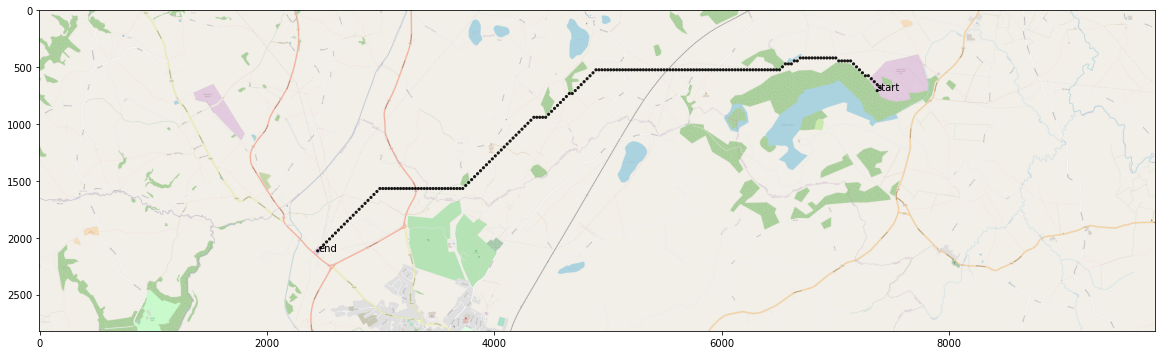

In [ ]:
#-------------------# Display Path #-----------------#
# Setting heat_map to true results in a long wait time. Suggest using it in zoom < 14 and stations less than 10 km away
# Zoom 16 will be approriate for stations <1km away (Zoom must be changed at initial search, not below)
gen_map(bounding_box, plant_location, substation_location, shortest_path=shortest_path, zoom_level=zoom_level, heat_map=False)
